In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
combo = pd.read_csv("combo.csv")
combo2 = pd.read_csv("fin_combo.csv")

In [10]:
combo = combo.drop('Unnamed: 0',axis = 1)
combo2 = combo2.drop('Unnamed: 0',axis = 1)

## For combo (merged dataset 1 and 2)
### A scatter plot comparing metascore aginst millions of sales and user score against millions of sales
### A scatter plot comparing 

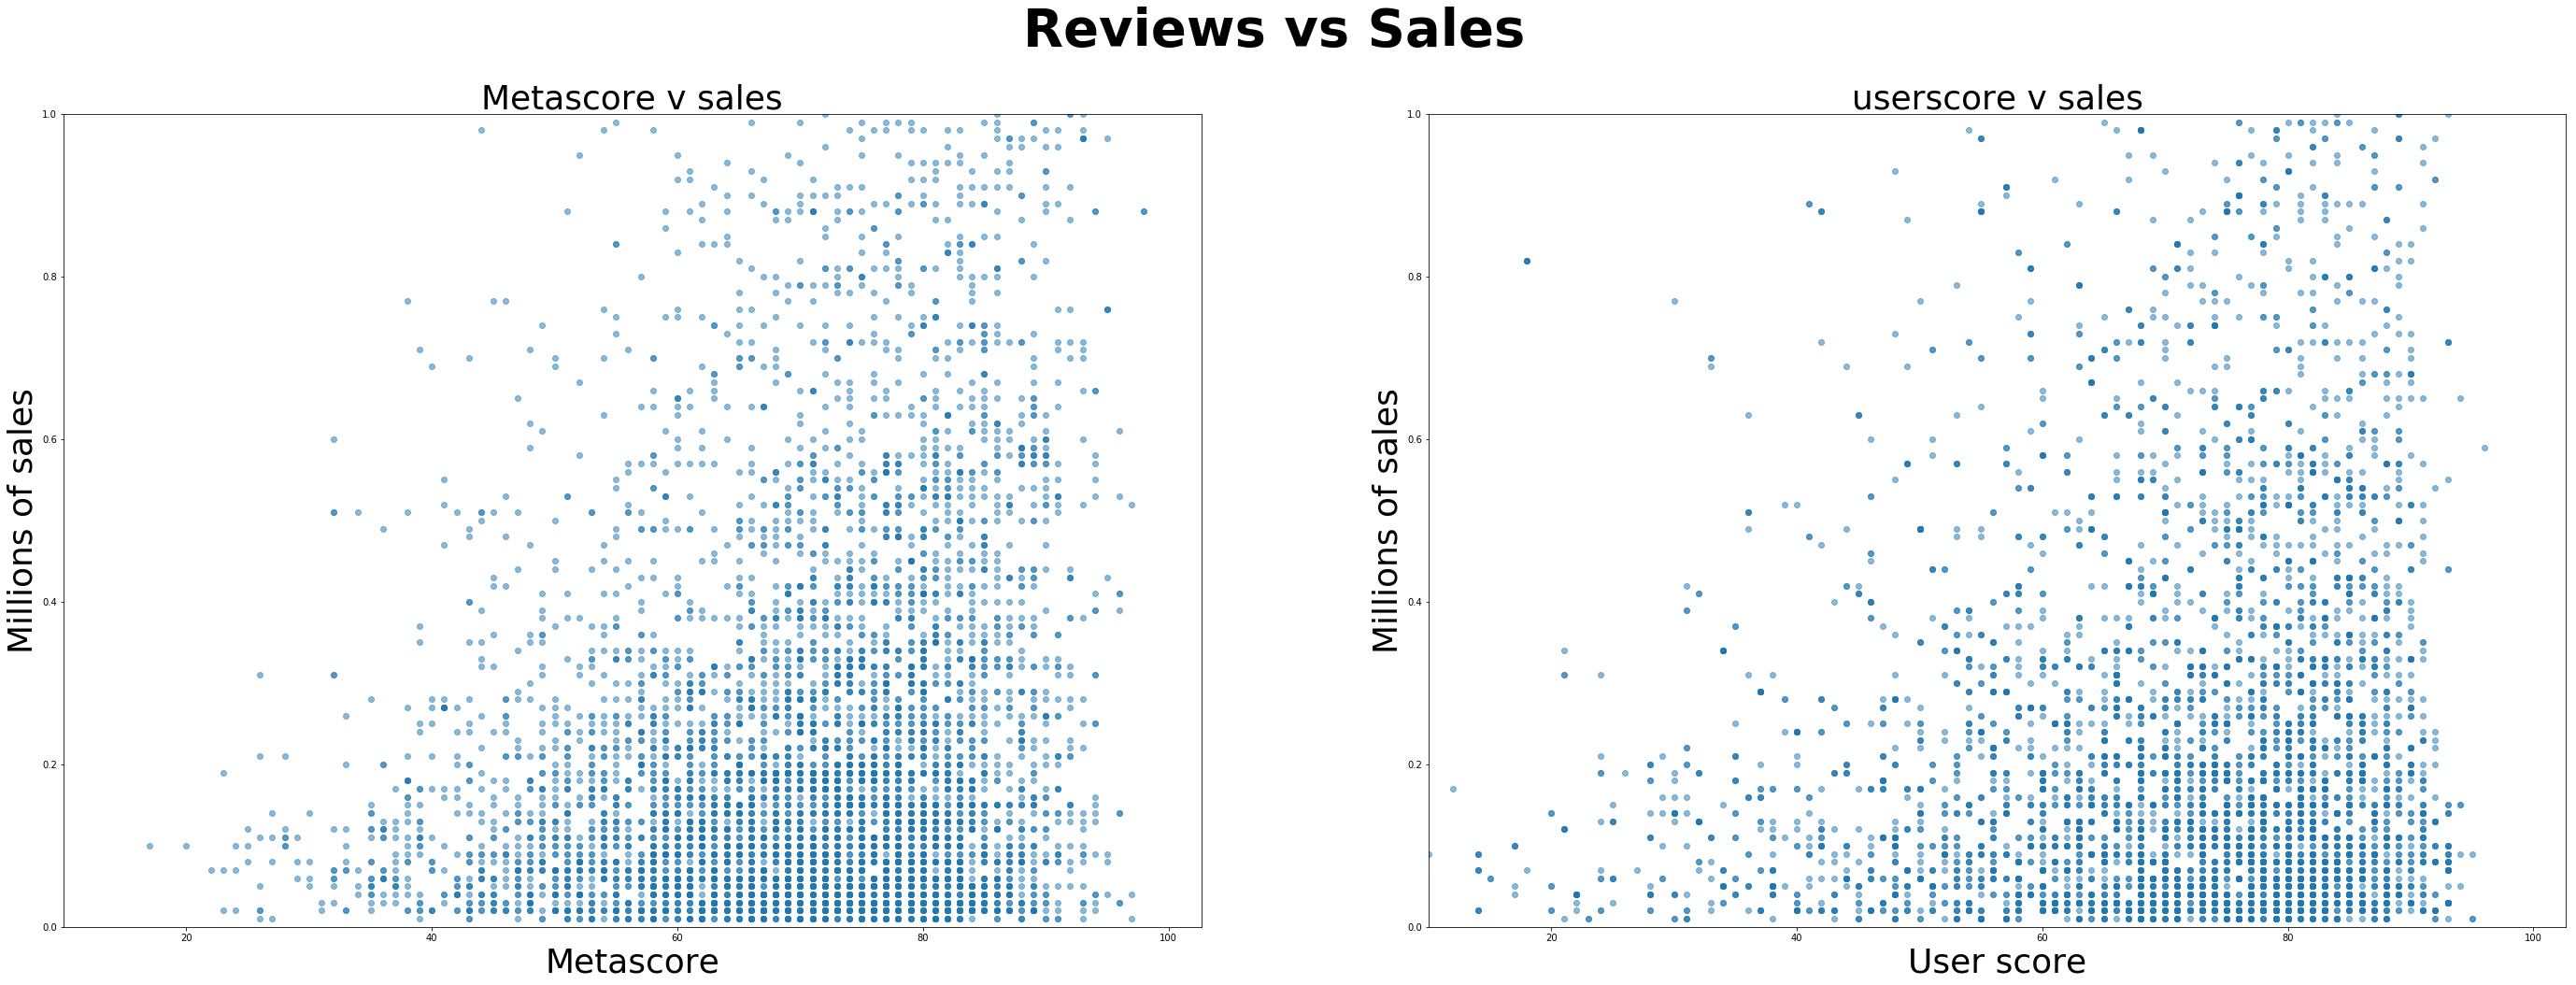

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (48,16)) 
ax[0].scatter(combo["metascore"], combo["Global_Sales"], alpha= 0.5)
ax[1].scatter(combo["User_Score"], combo["Global_Sales"], alpha= 0.5)
fig.suptitle("Reviews vs Sales", fontsize = 56, fontweight = "bold")

ax[0].set_title("Metascore v sales", fontsize = 36) 
ax[1].set_title("userscore v sales", fontsize = 36)
for var in ax:
    var.set_ylim(0,1)
    var.set_ylabel("Millions of sales", fontsize = 36)
ax[0].set_xlabel("Metascore", fontsize = 36)
ax[1].set_xlabel("User score", fontsize =36)
ax[0].set_xlim((100))
ax[1].set_xlim((10))
plt.show()

In [39]:

grouped = combo.groupby('console')
# splits the combo dataframe into multiple dataframes according to the console and stores them in an array "grouped".

combonintendo = grouped.get_group('GC')
# Creates a dataframe called combonintendo, in which I'll store information that relates to Nintendo.
# stores info on the Nintendo GameCube as of this line.
combonintendo = combonintendo.append(grouped.get_group('N64'), ignore_index = True)
# adds info on the Nintendo 64 to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('DS'), ignore_index = True)
# adds info on the Nintendo DS to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('3DS'), ignore_index = True)
# adds info on the Nintendo 3DS to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('WII'), ignore_index = True)
# adds info on the Nintendo Wii to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('GBA'), ignore_index = True)
# adds info on the Nintendo Gameboy Advance to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('WIIU'), ignore_index = True)
# adds info on the Nintendo Wii U to the dataframe, combonintendo.

comboxbox = grouped.get_group('XONE')
# Creates a dataframe called comboxbox, in which I'll store information that relates to the XBOX Line of consoles
# stores info on the XBOX One as of this line.
comboxbox = comboxbox.append(grouped.get_group('X360'), ignore_index = True)
# adds info on the Xbox 360 to the dataframe, comboxbox.
comboxbox = comboxbox.append(grouped.get_group('XBOX'), ignore_index = True)#
# adds info on the Xbox to the dataframe, comboxbox.
comboxbox = comboxbox.append(grouped.get_group('XB'), ignore_index = True)
# adds info on the Xbox to the dataframe, comboxbox.

combosony = grouped.get_group('PS')
# Creates a dataframe called combosony, in which I'll store information that relates to the Playstation Line of consoles.
# stores info on the original Playstation as of this line.
combosony = combosony.append(grouped.get_group('PS2'), ignore_index = True)
#adds info on the Playstation 2 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PS3'), ignore_index = True)
# adds info on the Playstation 3 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PS4'), ignore_index = True)
# adds info on the Playstation 4 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PSP'), ignore_index = True)
# adds info on the Playstation Portable to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PSV'), ignore_index = True)
# adds info on the Playstation Vita to the dataframe, combosony.
combopc = grouped.get_group('PC')
#Creates a dataframe called combosony, in which I'll store information that relates to the personal computer.

KeyError: 'XB'

## For combo 2(merged dataset 1 2 and 3)
### A scatter plot comparing metascore against millions of sales and user score against millions of sales
### A line graph comparing annual avg sales, user scores, critic scores against year

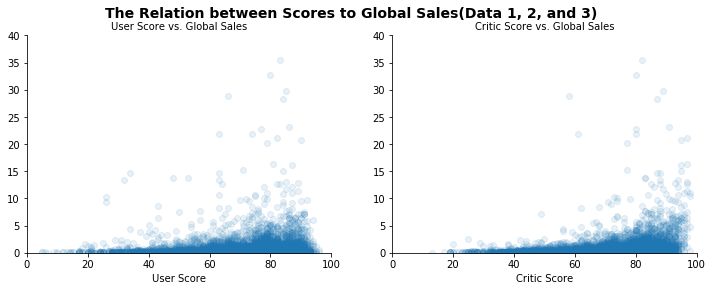

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 10) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 10)

count = 0
name_list = ['userscore','metascore']


for var in ax: 
    var.scatter(combo2[name_list[count]], combo2["tot_sale"],alpha= 0.1)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()

In [35]:
# year (line) avg sale, avg user score, avg critic score, 

combo2.sort_values("date", axis = 0, ascending = True, inplace = True)
year = []
for i in combo2.date:
    if year.count(i) == 0:
        year.append(i)
avg1 = 0
avg2 = 0
avg3 = 0
avg_sale = []
avg_user = []
avg_critic = []
for i in year:
    avg1 = combo2[combo2.date == i].tot_sale.mean()
    avg2 = combo2[combo2.date == i].userscore.mean()
    avg3 = combo2[combo2.date == i].metascore.mean()
    avg_sale.append(avg1)
    avg_user.append(avg2)
    avg_critic.append(avg3)
    avg1 = 0
    avg2 = 0
    avg3 = 0
years = pd.Series(year,name='year')
avgsale = pd.Series(avg_sale, name = 'sale')
avguser = pd.Series(avg_user,name= 'user_score')
avgcritic = pd.Series(avg_critic, name = 'critic_score')
annual_mean_combo = pd.concat([years,avgsale,avguser,avgcritic],axis=1)
annual_mean_combo =annual_mean_combo.set_index('year')

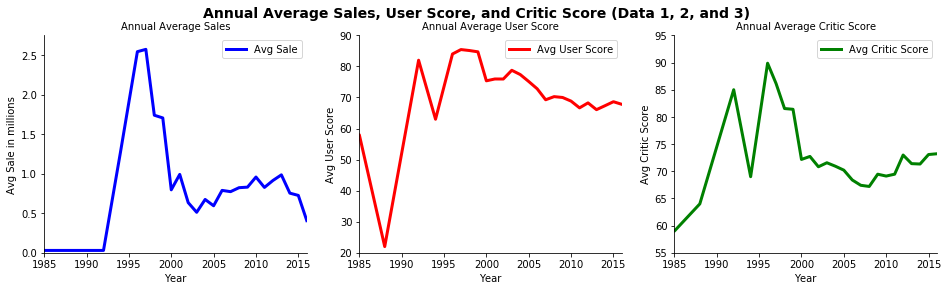

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

#labels
fig.suptitle("Annual Average Sales, User Score, and Critic Score (Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("Annual Average Sales", fontsize = 10) 
ax[1].set_title("Annual Average User Score", fontsize = 10)
ax[2].set_title("Annual Average Critic Score", fontsize = 10)

count = 0
name_list = ['sale','user_score','critic_score']

annual_mean_combo.sale.plot(ax = ax[0], color = 'b', linewidth = 3.0)
annual_mean_combo.user_score.plot(ax = ax[1], color = 'r', linewidth = 3.0)
annual_mean_combo.critic_score.plot(ax = ax[2], color = 'g', linewidth = 3.0)
for var in ax: 
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel('Year')
    var.set_xlim(1985,2016)
    
    if count == 0 :
        var.set_ylabel('Avg Sale in millions')
        var.set_ylim(0,2.75)
    elif count == 1:
        var.set_ylabel('Avg User Score')
        var.set_ylim(20,90)
    else:
        var.set_ylabel('Avg Critic Score')
        var.set_ylim(55,95)
    ax[0].legend(["Avg Sale"],frameon=True)
    ax[1].legend(["Avg User Score"],frameon=True)
    ax[2].legend(["Avg Critic Score"],frameon=True)
    count+=1    
plt.show()

In [40]:
grouped = combo.groupby('console')
# splits the combo dataframe into multiple dataframes according to the console and stores them in an array "grouped".

combonintendo = grouped.get_group('GC')
# Creates a dataframe called combonintendo, in which I'll store information that relates to Nintendo.
# stores info on the Nintendo GameCube as of this line.
combonintendo = combonintendo.append(grouped.get_group('N64'), ignore_index = True)
# adds info on the Nintendo 64 to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('DS'), ignore_index = True)
# adds info on the Nintendo DS to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('3DS'), ignore_index = True)
# adds info on the Nintendo 3DS to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('WII'), ignore_index = True)
# adds info on the Nintendo Wii to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('GBA'), ignore_index = True)
# adds info on the Nintendo Gameboy Advance to the dataframe, combonintendo.
combonintendo = combonintendo.append(grouped.get_group('WIIU'), ignore_index = True)
# adds info on the Nintendo Wii U to the dataframe, combonintendo.

comboxbox = grouped.get_group('XONE')
# Creates a dataframe called comboxbox, in which I'll store information that relates to the XBOX Line of consoles
# stores info on the XBOX One as of this line.
comboxbox = comboxbox.append(grouped.get_group('X360'), ignore_index = True)
# adds info on the Xbox 360 to the dataframe, comboxbox.
comboxbox = comboxbox.append(grouped.get_group('XBOX'), ignore_index = True)#
# adds info on the Xbox to the dataframe, comboxbox.
comboxbox = comboxbox.append(grouped.get_group('XB'), ignore_index = True)
# adds info on the Xbox to the dataframe, comboxbox.

combosony = grouped.get_group('PS')
# Creates a dataframe called combosony, in which I'll store information that relates to the Playstation Line of consoles.
# stores info on the original Playstation as of this line.
combosony = combosony.append(grouped.get_group('PS2'), ignore_index = True)
#adds info on the Playstation 2 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PS3'), ignore_index = True)
# adds info on the Playstation 3 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PS4'), ignore_index = True)
# adds info on the Playstation 4 to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PSP'), ignore_index = True)
# adds info on the Playstation Portable to the dataframe, combosony.
combosony = combosony.append(grouped.get_group('PSV'), ignore_index = True)
# adds info on the Playstation Vita to the dataframe, combosony.
combopc = grouped.get_group('PC')
#Creates a dataframe called combosony, in which I'll store information that relates to the personal computer.

KeyError: 'XB'